## Goal

Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so. The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don’t. This gives us a tremendous opportunity to understand what’s working well (and potentially scale it even further) and what’s not working well (and fix it).

The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.

This challenge is significantly easier than all others in this collection. There are no dates, no tables to join, no feature engineering required, and the problem is really straightforward. Therefore, it is a great starting point to get familiar with data science take-home challenges.
You should not move to the other challenges until you fully understand this one.

## Challenge Description


We have data about all users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

Your project is to:

Predict conversion rate

Come up with recommendations for the product team and the marketing team to improve conversion rate



## Data

In [42]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
  
#read from google drive
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")
  
print(data.head())


  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


## Descriptive Stats

Firstly, let’s inspect the data to look for weird behavior/wrong data. Data is never perfect in real life and requires to be cleaned. Identifying the wrong data and dealing with it is a crucial step

Describe and groupby are usually the best places to start:

In [43]:
print(data.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [44]:
data.groupby(['country']).size()

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64

In [45]:
data.groupby(['source']).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

In [46]:
sorted(data['age'].unique(),reverse=True)
## Check wrong data for age
data[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


It is just 2 users! In this case, we can remove them, nothing will change. In general, depending on the problem, you can:

remove the entire row saying you don’t trust the data

treat them as NAs

if there is a pattern, try to figure out what went wrong.

That being said, wrong data is worrisome and can be an indicator of some bug in the logging code. Therefore, when working, you will want to talk to the software engineer who implemented the logging code to see if, perhaps, there are some bugs which affect the data significantly.

Here, let’s just get rid of those two rows:



In [47]:
data = data[data['age']<100]

In [48]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Exploratory Data Analysis

Now, let’s quickly investigate the variables and how their distribution differs for the two classes. This will help us understand whether there is any information in our data in the first place and get a sense of the data.

In [49]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

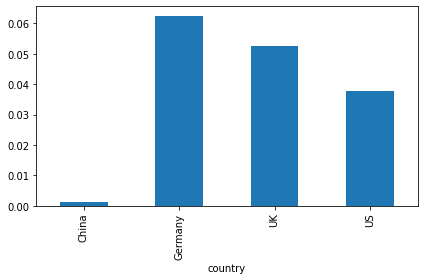

In [67]:
data.groupby(['country'])['converted'].mean().plot.bar()
# plt.show()

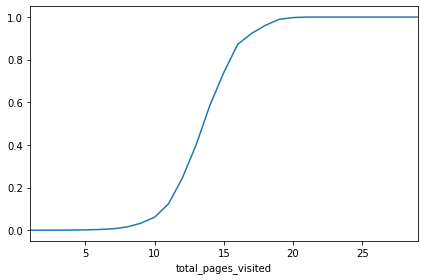

In [68]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

## Machine Learning Models

Let’s now build a model to predict conversion rate. Outcome is binary and you care about insights to give product and marketing team project ideas. You should probably choose among the following options:

Logistic regression

Decision Trees

RuleFit

Random Forest or Boosted Decision Trees in combination with partial dependence plots

It is good to add two lines to explain why you chose a given approach.

Ex: I am going to pick a random forest to predict conversion rate. I picked a random forest because: it usually requires very little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict conversion, then I will use its partial dependence plots and variable importance to get insights. Also, I will build a simple tree to find the most obvious user segments.


Firstly, let’s create dummy variables from the categorical ones:

In [73]:
#dummy variables for the categorical ones
data_dummy = pandas.get_dummies(data)

In [81]:
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [54]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)

In [56]:
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

In [57]:
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pandas.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[1, 0]))
)

OOB accuracy is 0.9838851885571901 
 OOB Confusion Matrix 
       0       1
0  4455    2261
1  1102  200872


In [59]:
print(
"Test accuracy is", rf.score(test.drop('converted', axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pandas.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop('converted', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9847360196450496 
 Test Set Confusion Matrix 
         0     1
0  103483   543
1    1098  2384


So, OOB error and test error are pretty similar, ~1.5%. We are confident we are not overfitting.

Error is pretty low. However, we started from a 97% accuracy (that’s the case if we classified everything as a “non converted”). So, 98.5% is good, but nothing shocking. Indeed, ~30% of conversions are predicted as “non conversion”.

If we cared about the very best possible accuracy or specifically minimizing false positive/false negative, we would find the best cut-off point. Since in this case that doesn’t appear to be particularly relevant, we are fine with the default 0.5 cutoff value used internally by the random forest to make the prediction.

If you care about insights, building a model is just the first step. You need to check that the model predicts well and, if it does, you can now extract insights out of it.

Let’s start by checking variable importance:

In [60]:
feature_importance = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)

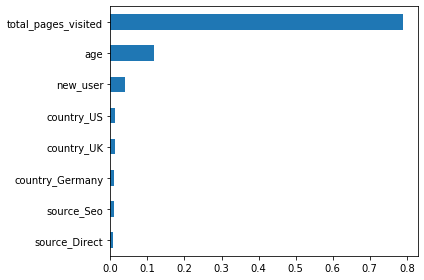

In [62]:
feature_importance.sort_values().plot(kind='barh')
plt.show()

However total page view is not actionable, which is something we cannot control. Let's rebuild the random forest model without page view.

Since classes are heavily unbalanced and we don’t have that very powerful variable anymore, let’s change the weights, just to make sure we will get something classified as 1.